## Title    - Reasonable House Rent Prediction
## Group no - 23
### Group members - 
####               EG/2020/4212 , Sewwandi L.L.C.
####              EG/2020/4214 , Shamali A.V.

In [486]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler 

In [487]:
#Import actual dataset for rental houses
data = pd.read_csv('Data/House_Rent_Dataset.csv')

data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# Data Preprocessing

In [488]:
data.shape

(4746, 12)

In [489]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None


### Check duplicates

In [490]:
data.duplicated().sum()

0

### Check nulls

In [491]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

### Drop unimportant features/columns

In [492]:
columns_to_drop = ['Posted On','Point of Contact']
data = data.drop(columns=columns_to_drop, axis=1)

### Encoding

In [493]:
# Count unique values for categorical data columns
print(data['Floor'].value_counts().size)
print(data['Area Type'].value_counts().size)
print(data['Area Locality'].value_counts().size)
print(data['City'].value_counts().size)
print(data['Furnishing Status'].value_counts().size)
print(data['Tenant Preferred'].value_counts().size)

480
3
2235
6
3
3


##### Use label encode method to encode dataset

In [494]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

#Add labels for features
data['Floor'] = label_encoder.fit_transform(data['Floor'])
data['Area Type'] = label_encoder.fit_transform(data['Area Type'])
data['Area Locality'] = label_encoder.fit_transform(data['Area Locality'])
data['City'] = label_encoder.fit_transform(data['City'])
data['Furnishing Status'] = label_encoder.fit_transform(data['Furnishing Status'])
data['Tenant Preferred'] = label_encoder.fit_transform(data['Tenant Preferred'])

In [495]:
data.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,455,2,221,4,2,1,2
1,2,20000,800,14,2,1527,4,1,1,1
2,2,17000,1000,14,2,1760,4,1,1,1
3,2,10000,800,10,2,526,4,2,1,1
4,2,7500,850,10,1,1890,4,2,0,1


### Remove outliers

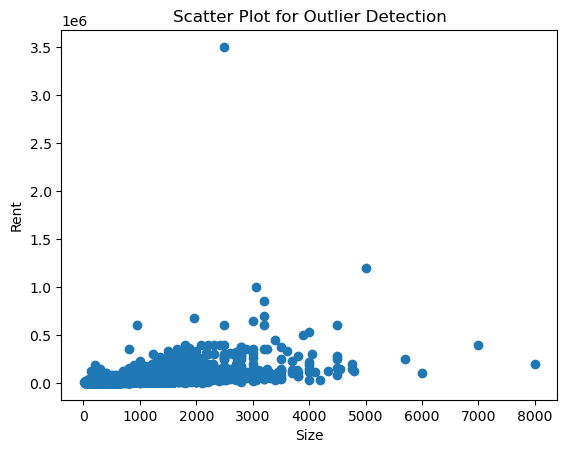

In [496]:
# Scatter plot to detect outliers
plt.scatter(data['Size'], data['Rent'])
plt.xlabel('Size')
plt.ylabel('Rent')
plt.title('Scatter Plot for Outlier Detection')
plt.show()

In [497]:
# Remove the outliers
threshold = 10000
data_no_outliers = data[data['Rent'] < threshold]

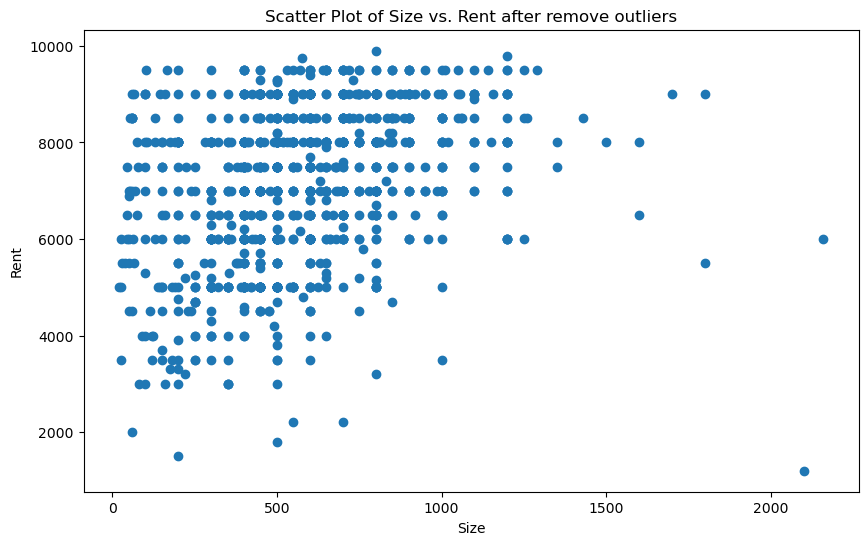

In [498]:
# Scatter plotter after removing outliers
plt.figure(figsize=(10, 6))
plt.scatter(data_no_outliers['Size'], data_no_outliers['Rent'], alpha=1)
plt.title('Scatter Plot of Size vs. Rent after remove outliers')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.show()

In [499]:
x = data.drop(columns ='Rent',axis =1)
y = data['Rent']

In [500]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [501]:
x_train.shape

(3322, 9)

In [502]:
x_test.shape

(1424, 9)

# Use Linear Regression 

#### Standardize the data for Linear Regression

In [503]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [504]:
# Linear Regression
L_reg = LinearRegression()

In [505]:
# for train data
L_reg.fit(x_train_scaled,y_train)

LinearRegression()

In [506]:
# Make the predictions
predictions = L_reg.predict(x_test_scaled)

In [507]:
# Calculate Mean Absolute Error
MAE_for_LR = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error for Linear Regression:", MAE_for_LR)

Mean Absolute Error for Linear Regression: 24185.536693679074


In [508]:
# Calculate Mean Squared Error
MSE_for_LR = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", MSE_for_LR)

# Calculate Root Mean Squared Error
RMSE_for_LR = np.sqrt(MSE_for_LR)
print("Root Mean Squared Error for Linear Regression:", RMSE_for_LR)

Mean Squared Error: 1906730092.57271
Root Mean Squared Error for Linear Regression: 43666.120649454424


#### Evaluate Model Performance

In [510]:
print("Linear Regression Model Performance:")
print("Root Mean Squared Error:", RMSE_for_LR)
print("Mean Absolute Error:", MAE_for_LR)

Linear Regression Model Performance:
Root Mean Squared Error: 43666.120649454424
Mean Absolute Error: 24185.536693679074


# Use Decision Tree 

#### GridSearchCV for hyperparameter tuning

In [511]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50,60,70,80,90,100],
    'min_samples_split': [2, 5, 10, 15, 20,25,30,35,40,45],
    'min_samples_leaf': [1, 2, 4, 8, 12,16,20,24,28,32]
}

In [512]:
# Create Decision Tree regressor
DT_reg = DecisionTreeRegressor(random_state=42)

In [513]:
# Use GridSearchCV for hyperparameter tuning
grid_search_DT = GridSearchCV(DT_reg, param_grid, cv=8, scoring='r2')
grid_search_DT.fit(x_train_scaled, y_train)

GridSearchCV(cv=8, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                       100],
                         'min_samples_leaf': [1, 2, 4, 8, 12, 16, 20, 24, 28,
                                              32],
                         'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35, 40,
                                               45]},
             scoring='r2')

In [514]:
# Get the best parameters
best_params_DT = grid_search_DT.best_params_

#### Train the Decision Tree model with the best parameters

In [515]:
# Train the Decision Tree model with the best parameters
DT_reg_best = DecisionTreeRegressor(**best_params_DT, random_state=42)
DT_reg_best.fit(x_train_scaled, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, random_state=42)

In [516]:
# Make predictions
predictions_DT = DT_reg_best.predict(x_test_scaled)

In [517]:
# Calculate R-squared score
R2_for_DT = r2_score(y_test, predictions_DT)
print("R-squared score for Decision Tree:", R2_for_DT)

R-squared score for Decision Tree: 0.6035168516683571


In [518]:
# Calculate mean absolute error
MAE_for_DT = mean_absolute_error(y_test, predictions_DT)
print("Mean Absolute Error for Decision Tree:", MAE_for_DT)

Mean Absolute Error for Decision Tree: 14451.898602381014


In [519]:
# Calculate Mean Squared Error
MSE_for_DT = mean_squared_error(y_test, predictions_DT)
print("Mean Squared Error:", MSE_for_DT)

# Calculate Root Mean Squared Error
RMSE_for_DT = np.sqrt(MSE_for_DT)
print("Root Mean Squared Error for Decision Tree:", RMSE_for_DT)

Mean Squared Error: 1395362401.9726982
Root Mean Squared Error for Decision Tree: 37354.54995007567


#### Evaluate Model Performance

In [520]:
print("Decision Tree Model Performance:")
print("R-squared score:",R2_for_DT)
print("Root Mean Squared Error:", RMSE_for_DT)
print("Mean Absolute Error:", MAE_for_DT)

Decision Tree Model Performance:
R-squared score: 0.6035168516683571
Root Mean Squared Error: 37354.54995007567
Mean Absolute Error: 14451.898602381014
